In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('./dataset/kc_house_data (Decision Tree).xlsx')
df = df.reindex(np.random.permutation(df.index)).head(1000)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_range
15803,9550200265,20140818T000000,625000,3,1.00,1240,4080,1.0,0,0,...,1240,0,1925,0,98103,47.6670,-122.333,2060,4080,600000 > Price < 700000
7588,3024079069,20140911T000000,371000,4,1.00,1960,94525,1.5,0,0,...,1960,0,1979,0,98027,47.5418,-121.962,2430,188564,300000 > Price < 400000
2419,7524600120,20150305T000000,250000,3,2.00,1560,32137,1.0,0,0,...,910,650,1976,0,98092,47.3197,-122.117,1470,29150,200000 > Price < 300000
20363,2469000010,20150323T000000,1081000,4,2.25,2100,12172,1.0,0,0,...,2100,0,1961,0,98040,47.5458,-122.227,2400,10713,Price > 1000000
21016,4232900310,20141029T000000,1430000,5,4.25,3350,3600,2.0,0,0,...,2260,1090,2014,0,98119,47.6351,-122.364,1810,3600,Price > 1000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13141,2206500430,20140709T000000,525000,4,1.75,1710,10440,1.0,0,0,...,1710,0,1955,0,98006,47.5756,-122.158,1480,10440,500000 > Price < 600000
19838,7129303045,20150417T000000,949950,5,2.50,2340,1989,2.0,1,4,...,2340,0,1959,0,98118,47.5193,-122.257,2200,3230,900000 > Price < 1000000
19786,7974200457,20150122T000000,935000,5,3.00,2700,5001,2.0,0,0,...,2700,0,2009,0,98115,47.6811,-122.288,1610,5191,900000 > Price < 1000000
16285,926069009,20140609T000000,649950,4,2.50,2350,63162,2.0,0,0,...,2350,0,1994,0,98077,47.7545,-122.047,2370,63162,600000 > Price < 700000


In [3]:
Y = df.price_range
Y

15803     600000 > Price < 700000
7588      300000 > Price < 400000
2419      200000 > Price < 300000
20363             Price > 1000000
21016             Price > 1000000
                   ...           
13141     500000 > Price < 600000
19838    900000 > Price < 1000000
19786    900000 > Price < 1000000
16285     600000 > Price < 700000
10349     400000 > Price < 500000
Name: price_range, Length: 1000, dtype: object

In [4]:
# X = df.drop(['date', 'price', 'id', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_range'], axis=1)
X = df[['bedrooms', 'bathrooms']]
X

,bedrooms,bathrooms
15803,3,1.00
7588,4,1.00
2419,3,2.00
20363,4,2.25
21016,5,4.25
...,...,...
13141,4,1.75
19838,5,2.50
19786,5,3.00
16285,4,2.50


In [5]:
target_name = list(set(Y))
feature_name = list(X.columns)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [8]:
X_train.shape, Y_train.shape

((800, 2), (800,))

In [17]:
X_test.shape, Y_test.shape

((200, 2), (200,))

In [18]:
from sklearn import neighbors

In [19]:
model = neighbors.KNeighborsClassifier(n_neighbors=5)

In [20]:
clf = model.fit(X_train, Y_train)
clf

KNeighborsClassifier()

In [21]:
Y_pred = clf.predict(X_test)
Y_pred

array(['100000 > Price < 200000', '300000 > Price < 400000',
       '500000 > Price < 600000', '300000 > Price < 400000',
       '200000 > Price < 300000', '500000 > Price < 600000',
       '200000 > Price < 300000', '300000 > Price < 400000',
       '300000 > Price < 400000', '300000 > Price < 400000',
       '700000 > Price < 800000', '300000 > Price < 400000',
       '300000 > Price < 400000', '200000 > Price < 300000',
       '300000 > Price < 400000', '300000 > Price < 400000',
       '300000 > Price < 400000', '200000 > Price < 300000',
       '200000 > Price < 300000', '500000 > Price < 600000',
       '300000 > Price < 400000', '300000 > Price < 400000',
       '400000 > Price < 500000', '300000 > Price < 400000',
       '300000 > Price < 400000', '300000 > Price < 400000',
       '600000 > Price < 700000', '200000 > Price < 300000',
       '200000 > Price < 300000', '200000 > Price < 300000',
       '500000 > Price < 600000', '200000 > Price < 300000',
       '500000 > Price <

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

In [23]:
cmap_light = ListedColormap(['orange', 'red', 'blue', 'green', 'yellow', 'grey', 'purple', 'violet', 'navy', 'pink', 'peru'])
cmap_bold= ['orange', 'red', 'blue', 'green', 'yellow', 'grey', 'purple', 'violet', 'navy', 'pink', 'peru']

/var/folders/qy/_j73x4d17zg72_0spy2h7k980000gn/T/ipykernel_90203/2500311084.py:13: UserWarning: The palette list has more values (11) than needed (8), which may not be intended.
  sns.scatterplot(


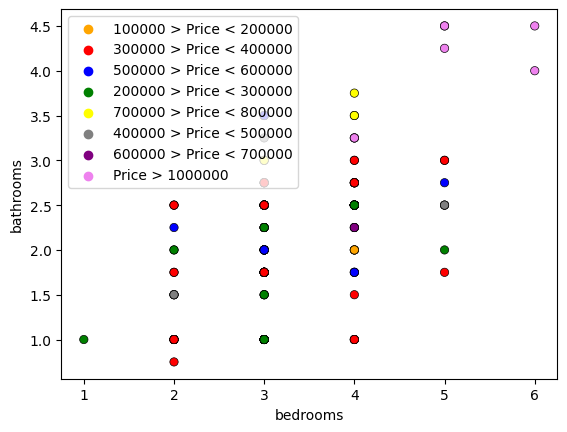

In [26]:
_, ax = plt.subplots()
# DecisionBoundaryDisplay.from_estimator(
#     clf,
#     X_test,
#     cmap=cmap_light,
#     ax=ax,
#     response_method="predict",
#     plot_method="pcolormesh",
#     xlabel=feature_name[0],
#     ylabel=feature_name[1],
#     shading="auto",
# )
sns.scatterplot(
    x=X_test['bedrooms'],
    y=X_test['bathrooms'],
    hue=Y_pred,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.show()